In [5]:
#导入需要的模块包
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
iris = load_iris()

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
#标签名称
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
#特征名称
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

0.9666666666666666 4


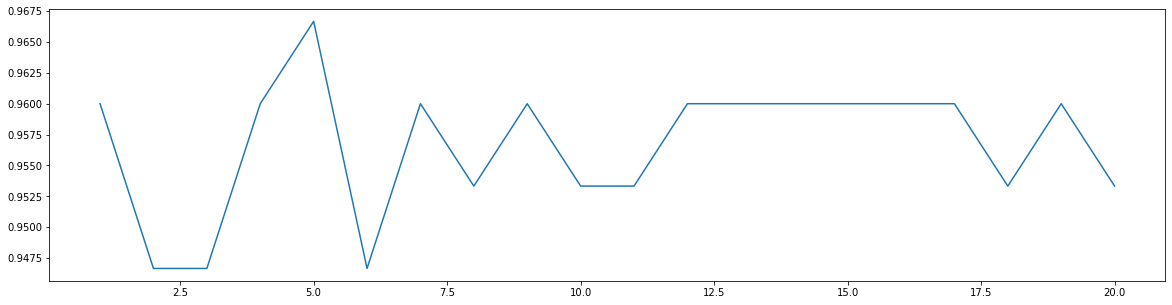

In [20]:

scorel=[]
for i in range(0,20,1):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                n_jobs=-1,
                                random_state=30)
    score = cross_val_score(rfc,iris.data,iris.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))))
plt.figure(figsize=[20,5])
plt.plot(range(1,21,1),scorel)
plt.show()
    

In [61]:
model = RandomForestClassifier(n_estimators=5,
                                n_jobs=-1,
                                random_state=30)
score = cross_val_score(model,iris.data,iris.target,cv=10).mean()
score

0.9666666666666666

In [62]:
#调整max_depth
param_grid = {'max_depth':np.arange(1,10,1)}
d = rfc = RandomForestClassifier(n_estimators=5,
                                n_jobs=-1,
                                random_state=30)
GS = GridSearchCV(d,param_grid,cv=10)
GS.fit(iris.data,iris.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=5, n_jobs=-1,
                                              random_state=30),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [63]:
GS.best_params_

{'max_depth': 4}

In [64]:
GS.best_score_

0.9666666666666666

In [65]:
#调整max_features
param_grid = {'max_features':np.arange(1,5,1)}
c = rfc = RandomForestClassifier(n_estimators=5,
                                n_jobs=-1,
                                random_state=30,
                                max_depth =4                            
                                )
GS = GridSearchCV(c,param_grid,cv=10)
GS.fit(iris.data,iris.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=5,
                                              n_jobs=-1, random_state=30),
             param_grid={'max_features': array([1, 2, 3, 4])})

In [66]:
GS.best_params_

{'max_features': 2}

In [67]:
GS.best_score_
#调整加入参数max_features，max_features越大模型越复杂，一般去根号特征数

0.9666666666666666

In [69]:
#调整Criterion
param_grid = {'criterion':['gini','entropy']}
iriss = RandomForestClassifier(n_estimators=5,
                                n_jobs=-1,
                                random_state=30,
                                max_depth =4,
                               max_features=2
                                )
GS = GridSearchCV(iriss,param_grid,cv=10)
GS.fit(iris.data,iris.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=4, max_features=2,
                                              n_estimators=5, n_jobs=-1,
                                              random_state=30),
             param_grid={'criterion': ['gini', 'entropy']})

In [70]:
GS.best_params_

{'criterion': 'gini'}

In [71]:
GS.best_score_

0.9666666666666666

In [75]:
model_finish = RandomForestClassifier(n_estimators=5,
                                n_jobs=-1,
                                random_state=30,
                                max_depth =4,
                                max_features=2,
                                criterion='gini'
                                     )
score = cross_val_score(model,iris.data,iris.target,cv=10).mean()
score

0.9666666666666666